## 0. Install and Import Dependencies

In [1]:
!pip install mediapipe

In [2]:
!pip install opencv-python

In [1]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [2]:
# VIDEO FEED
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Mediapipe Feed', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## 1. Make Detections

In [5]:
cap = cv2.VideoCapture(0)
# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )


        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [19]:
mp_drawing.draw_landmarks

<function mediapipe.python.solutions.drawing_utils.draw_landmarks(image: numpy.ndarray, landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList, connections: Optional[List[Tuple[int, int]]] = None, landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2), connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2))>

NameError: name 'landmark_list' is not defined

In [4]:
mp_drawing.draw_landmarks??

In [5]:
mp_drawing.DrawingSpec??

## 2. Determining Joints
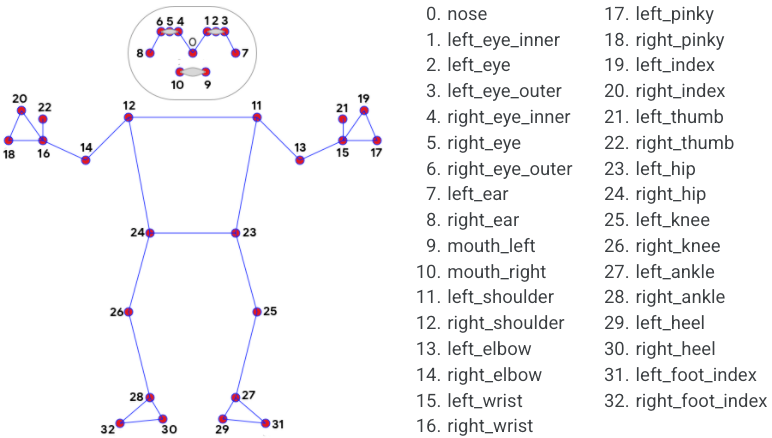

### Landmarks
#### There are 33 landmarks in total, starting from index0.
#### these represent the different joints within the pose.

In [18]:
cap = cv2.VideoCapture(0)
# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract Landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )


        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

[x: 0.6712229251861572
y: 0.7862203121185303
z: -3.4350829124450684
visibility: 0.9995538592338562
, x: 0.7171021699905396
y: 0.679850697517395
z: -3.428652286529541
visibility: 0.9994139671325684
, x: 0.7413221597671509
y: 0.678080677986145
z: -3.4283089637756348
visibility: 0.9995946288108826
, x: 0.763941764831543
y: 0.6775379180908203
z: -3.4288527965545654
visibility: 0.9992642998695374
, x: 0.6353535056114197
y: 0.6856476068496704
z: -3.4159209728240967
visibility: 0.9993125200271606
, x: 0.6075817942619324
y: 0.6851708889007568
z: -3.4158973693847656
visibility: 0.9994791150093079
, x: 0.5837077498435974
y: 0.6835857629776001
z: -3.4159324169158936
visibility: 0.9991438388824463
, x: 0.8030893206596375
y: 0.6739857196807861
z: -2.787447690963745
visibility: 0.9997410178184509
, x: 0.5558842420578003
y: 0.6650396585464478
z: -2.688847541809082
visibility: 0.9998072981834412
, x: 0.7190116047859192
y: 0.8733583092689514
z: -3.1423702239990234
visibility: 0.9992977380752563
, x: 0.

[x: 0.6717671751976013
y: 0.7834413647651672
z: -2.630462169647217
visibility: 0.9995115995407104
, x: 0.717203676700592
y: 0.6771926879882812
z: -2.607177257537842
visibility: 0.9994098544120789
, x: 0.7418131828308105
y: 0.6755639314651489
z: -2.6067898273468018
visibility: 0.9995765686035156
, x: 0.7645692229270935
y: 0.6744619607925415
z: -2.6071760654449463
visibility: 0.9992783069610596
, x: 0.6321752667427063
y: 0.6805083155632019
z: -2.5990827083587646
visibility: 0.9992960095405579
, x: 0.6050685048103333
y: 0.6812670230865479
z: -2.5986695289611816
visibility: 0.9994426965713501
, x: 0.5818421244621277
y: 0.6815733313560486
z: -2.5987448692321777
visibility: 0.9991403222084045
, x: 0.8039304614067078
y: 0.6665869355201721
z: -1.9693723917007446
visibility: 0.999722957611084
, x: 0.5559285879135132
y: 0.6698558330535889
z: -1.8966848850250244
visibility: 0.9997695088386536
, x: 0.7224503755569458
y: 0.8712633848190308
z: -2.3465893268585205
visibility: 0.9991896748542786
, x: 

[x: 0.6725278496742249
y: 0.7861657738685608
z: -2.903531551361084
visibility: 0.9995307326316833
, x: 0.7175643444061279
y: 0.6781245470046997
z: -2.8960461616516113
visibility: 0.9994707107543945
, x: 0.7422316074371338
y: 0.6763198375701904
z: -2.8956398963928223
visibility: 0.9996029734611511
, x: 0.7649081945419312
y: 0.6744690537452698
z: -2.8960931301116943
visibility: 0.9993715286254883
, x: 0.631854772567749
y: 0.6810508966445923
z: -2.885441541671753
visibility: 0.9993440508842468
, x: 0.6047857999801636
y: 0.6818132996559143
z: -2.8853533267974854
visibility: 0.9994393587112427
, x: 0.5816355347633362
y: 0.6825105547904968
z: -2.8854644298553467
visibility: 0.9992011189460754
, x: 0.8037600517272949
y: 0.6638116240501404
z: -2.2761476039886475
visibility: 0.9997462034225464
, x: 0.5570725202560425
y: 0.6736406087875366
z: -2.193956136703491
visibility: 0.9997540712356567
, x: 0.7236717939376831
y: 0.8720420002937317
z: -2.6190719604492188
visibility: 0.9992333054542542
, x: 

[x: 0.6726041436195374
y: 0.7835208773612976
z: -2.7157106399536133
visibility: 0.9994786381721497
, x: 0.717486560344696
y: 0.6762203574180603
z: -2.6687636375427246
visibility: 0.9994558691978455
, x: 0.7422041893005371
y: 0.6740952134132385
z: -2.6682965755462646
visibility: 0.9995777010917664
, x: 0.7648352980613708
y: 0.6719442009925842
z: -2.668769359588623
visibility: 0.9993672370910645
, x: 0.6314694285392761
y: 0.6800712943077087
z: -2.6609771251678467
visibility: 0.9993080496788025
, x: 0.6044216752052307
y: 0.6811283826828003
z: -2.660547971725464
visibility: 0.9993855357170105
, x: 0.5814177393913269
y: 0.6822853088378906
z: -2.660658597946167
visibility: 0.9991711974143982
, x: 0.8030233383178711
y: 0.6614469289779663
z: -1.8887649774551392
visibility: 0.9997329711914062
, x: 0.5580316185951233
y: 0.6762595772743225
z: -1.8322397470474243
visibility: 0.9997188448905945
, x: 0.7241564989089966
y: 0.8687142729759216
z: -2.405552864074707
visibility: 0.9991295337677002
, x: 0

[x: 0.6730840802192688
y: 0.7814028859138489
z: -2.755094289779663
visibility: 0.9994436502456665
, x: 0.717438280582428
y: 0.6736042499542236
z: -2.7125096321105957
visibility: 0.9994341135025024
, x: 0.7421560287475586
y: 0.671050488948822
z: -2.7123732566833496
visibility: 0.9995616674423218
, x: 0.764737606048584
y: 0.6684955358505249
z: -2.7126400470733643
visibility: 0.9993586540222168
, x: 0.6313947439193726
y: 0.6777365207672119
z: -2.713472604751587
visibility: 0.9992730617523193
, x: 0.6043907999992371
y: 0.6784080862998962
z: -2.7132506370544434
visibility: 0.9993581771850586
, x: 0.5814803838729858
y: 0.679172933101654
z: -2.7133920192718506
visibility: 0.9991464018821716
, x: 0.8027395009994507
y: 0.6561707854270935
z: -2.0197794437408447
visibility: 0.9997236132621765
, x: 0.5585635304450989
y: 0.6713687777519226
z: -1.983856439590454
visibility: 0.9996992945671082
, x: 0.7247587442398071
y: 0.8673995137214661
z: -2.4544575214385986
visibility: 0.9990885853767395
, x: 0.6

[x: 0.6736013889312744
y: 0.7765258550643921
z: -2.6426494121551514
visibility: 0.9994430541992188
, x: 0.7179526090621948
y: 0.6683748364448547
z: -2.613729238510132
visibility: 0.9994477033615112
, x: 0.7429457902908325
y: 0.6657319664955139
z: -2.613431453704834
visibility: 0.999569833278656
, x: 0.7657378911972046
y: 0.6632563471794128
z: -2.613717555999756
visibility: 0.9993774890899658
, x: 0.6313594579696655
y: 0.6731201410293579
z: -2.6043434143066406
visibility: 0.9992827773094177
, x: 0.6043249368667603
y: 0.6739078164100647
z: -2.603991985321045
visibility: 0.9993640780448914
, x: 0.58144211769104
y: 0.6748088002204895
z: -2.604076862335205
visibility: 0.9991645216941833
, x: 0.8044909238815308
y: 0.6496981382369995
z: -1.9737030267715454
visibility: 0.9997285604476929
, x: 0.5584183931350708
y: 0.6668045520782471
z: -1.8917938470840454
visibility: 0.999697744846344
, x: 0.7258375883102417
y: 0.8649832606315613
z: -2.3594138622283936
visibility: 0.9990642070770264
, x: 0.628

[x: 0.6744616031646729
y: 0.7756623029708862
z: -3.1424660682678223
visibility: 0.9994828701019287
, x: 0.7183874249458313
y: 0.6675130128860474
z: -3.10813045501709
visibility: 0.9994743466377258
, x: 0.7434536218643188
y: 0.6648183465003967
z: -3.107896089553833
visibility: 0.9995940923690796
, x: 0.7663370370864868
y: 0.6622627377510071
z: -3.1081318855285645
visibility: 0.9994016885757446
, x: 0.6313645243644714
y: 0.6721659302711487
z: -3.106957197189331
visibility: 0.9993356466293335
, x: 0.6041969060897827
y: 0.6728609204292297
z: -3.107212543487549
visibility: 0.9994248747825623
, x: 0.5813117623329163
y: 0.67360520362854
z: -3.107464551925659
visibility: 0.9992380142211914
, x: 0.8054292798042297
y: 0.6490236520767212
z: -2.410125255584717
visibility: 0.9997361302375793
, x: 0.5577972531318665
y: 0.664658784866333
z: -2.3634090423583984
visibility: 0.999725341796875
, x: 0.7263392806053162
y: 0.8649046421051025
z: -2.833200693130493
visibility: 0.9990809559822083
, x: 0.628692

[x: 0.6718124151229858
y: 0.7708764672279358
z: -2.4978256225585938
visibility: 0.999484658241272
, x: 0.7171874046325684
y: 0.6654664874076843
z: -2.459418296813965
visibility: 0.9994837045669556
, x: 0.7425434589385986
y: 0.6632286906242371
z: -2.4591898918151855
visibility: 0.9995941519737244
, x: 0.7655512094497681
y: 0.6610965728759766
z: -2.459419012069702
visibility: 0.9994053840637207
, x: 0.6296738982200623
y: 0.668617844581604
z: -2.4513792991638184
visibility: 0.9993431568145752
, x: 0.6026514172554016
y: 0.6686306595802307
z: -2.4509387016296387
visibility: 0.9994269609451294
, x: 0.5798426866531372
y: 0.6685229539871216
z: -2.4510979652404785
visibility: 0.99925297498703
, x: 0.8054028749465942
y: 0.648591160774231
z: -1.8051002025604248
visibility: 0.9997293949127197
, x: 0.5574200749397278
y: 0.6593337655067444
z: -1.725830316543579
visibility: 0.9997215270996094
, x: 0.7245343923568726
y: 0.861322820186615
z: -2.213650703430176
visibility: 0.9990560412406921
, x: 0.6264

[x: 0.6682920455932617
y: 0.7690555453300476
z: -2.6871705055236816
visibility: 0.9995617270469666
, x: 0.7153722643852234
y: 0.6644226908683777
z: -2.658050537109375
visibility: 0.9995623230934143
, x: 0.741028904914856
y: 0.6622585654258728
z: -2.6577696800231934
visibility: 0.9996552467346191
, x: 0.7640748620033264
y: 0.6602777242660522
z: -2.6580936908721924
visibility: 0.9994984269142151
, x: 0.626902163028717
y: 0.667655885219574
z: -2.6497178077697754
visibility: 0.9994366765022278
, x: 0.6001853942871094
y: 0.6675916910171509
z: -2.6493823528289795
visibility: 0.9995039701461792
, x: 0.5777233242988586
y: 0.6673721671104431
z: -2.6495068073272705
visibility: 0.999355137348175
, x: 0.80492103099823
y: 0.6484960317611694
z: -1.9793447256088257
visibility: 0.9997715950012207
, x: 0.557117760181427
y: 0.6572087407112122
z: -1.9193130731582642
visibility: 0.9997557997703552
, x: 0.7225321531295776
y: 0.8581664562225342
z: -2.395966053009033
visibility: 0.9991813898086548
, x: 0.623

[x: 0.667426347732544
y: 0.7665939927101135
z: -2.894855260848999
visibility: 0.9995721578598022
, x: 0.7149587273597717
y: 0.6628936529159546
z: -2.863116979598999
visibility: 0.9995699524879456
, x: 0.7407812476158142
y: 0.6611260771751404
z: -2.8627593517303467
visibility: 0.9996609687805176
, x: 0.7638655304908752
y: 0.6594504714012146
z: -2.8630576133728027
visibility: 0.9995038509368896
, x: 0.6260122656822205
y: 0.6651233434677124
z: -2.8533215522766113
visibility: 0.99945068359375
, x: 0.5992479920387268
y: 0.6648817658424377
z: -2.853222131729126
visibility: 0.9995220303535461
, x: 0.5768409371376038
y: 0.6644898653030396
z: -2.853384256362915
visibility: 0.9993786215782166
, x: 0.8049143552780151
y: 0.6497304439544678
z: -2.193337917327881
visibility: 0.9997718930244446
, x: 0.5560238361358643
y: 0.6551375985145569
z: -2.1122219562530518
visibility: 0.9997639060020447
, x: 0.7219379544258118
y: 0.8562755584716797
z: -2.6001834869384766
visibility: 0.9991753697395325
, x: 0.62

[x: 0.6669203639030457
y: 0.7690632939338684
z: -2.9282071590423584
visibility: 0.999587893486023
, x: 0.7146040201187134
y: 0.6648848652839661
z: -2.9009928703308105
visibility: 0.9995757937431335
, x: 0.7402819395065308
y: 0.6635887622833252
z: -2.9006900787353516
visibility: 0.9996703267097473
, x: 0.7632156610488892
y: 0.6623950600624084
z: -2.9009454250335693
visibility: 0.9995142817497253
, x: 0.6259395480155945
y: 0.6663976311683655
z: -2.8884117603302
visibility: 0.9994635581970215
, x: 0.5991846919059753
y: 0.6659048199653625
z: -2.888411045074463
visibility: 0.9995394945144653
, x: 0.576802134513855
y: 0.66534823179245
z: -2.8886518478393555
visibility: 0.9993970394134521
, x: 0.8043764233589172
y: 0.6530190110206604
z: -2.2348384857177734
visibility: 0.9997797012329102
, x: 0.5562665462493896
y: 0.6554263830184937
z: -2.1433968544006348
visibility: 0.9997702836990356
, x: 0.7210969924926758
y: 0.8584134578704834
z: -2.6336798667907715
visibility: 0.9991822838783264
, x: 0.62

[x: 0.6647835969924927
y: 0.7831832766532898
z: -2.9341702461242676
visibility: 0.9993730187416077
, x: 0.7138373851776123
y: 0.6767128109931946
z: -2.9073081016540527
visibility: 0.9993788003921509
, x: 0.7395752668380737
y: 0.6765288710594177
z: -2.9070942401885986
visibility: 0.9995031356811523
, x: 0.7625294327735901
y: 0.6765064001083374
z: -2.907557964324951
visibility: 0.9993099570274353
, x: 0.6256564855575562
y: 0.6768567562103271
z: -2.905200719833374
visibility: 0.9992226362228394
, x: 0.5990526676177979
y: 0.6760784983634949
z: -2.9052491188049316
visibility: 0.9993228316307068
, x: 0.5767450928688049
y: 0.6753447651863098
z: -2.9054932594299316
visibility: 0.9991580843925476
, x: 0.8042324185371399
y: 0.6734456419944763
z: -2.2362115383148193
visibility: 0.9996612071990967
, x: 0.5568584203720093
y: 0.6649192571640015
z: -2.1897828578948975
visibility: 0.9996457695960999
, x: 0.7183358073234558
y: 0.8709132671356201
z: -2.634791851043701
visibility: 0.9988296627998352
, x:

[x: 0.6650776863098145
y: 0.7902750372886658
z: -2.881537914276123
visibility: 0.9993634223937988
, x: 0.7146624326705933
y: 0.682608962059021
z: -2.856358289718628
visibility: 0.999374508857727
, x: 0.7402886152267456
y: 0.6823218464851379
z: -2.8560633659362793
visibility: 0.9995047450065613
, x: 0.7632601857185364
y: 0.682236909866333
z: -2.8564693927764893
visibility: 0.9993035793304443
, x: 0.6266835927963257
y: 0.6838279366493225
z: -2.849195957183838
visibility: 0.999220609664917
, x: 0.5996938943862915
y: 0.6834791302680969
z: -2.84904146194458
visibility: 0.9993289113044739
, x: 0.5771697163581848
y: 0.6831637620925903
z: -2.8492186069488525
visibility: 0.9991550445556641
, x: 0.8048261404037476
y: 0.6804122924804688
z: -2.2111377716064453
visibility: 0.9996609687805176
, x: 0.5565248727798462
y: 0.6741654276847839
z: -2.1350338459014893
visibility: 0.9996544718742371
, x: 0.7179170846939087
y: 0.87800532579422
z: -2.5910587310791016
visibility: 0.9988207817077637
, x: 0.61921

[x: 0.6632302403450012
y: 0.7882135510444641
z: -2.669597625732422
visibility: 0.9993572235107422
, x: 0.7142968773841858
y: 0.6813787221908569
z: -2.6473114490509033
visibility: 0.9993798732757568
, x: 0.7400362491607666
y: 0.6809231042861938
z: -2.646894693374634
visibility: 0.9995059967041016
, x: 0.7631262540817261
y: 0.6807695627212524
z: -2.6471283435821533
visibility: 0.999303936958313
, x: 0.626173198223114
y: 0.6830361485481262
z: -2.6384100914001465
visibility: 0.9992313385009766
, x: 0.5993229746818542
y: 0.6825218200683594
z: -2.6380703449249268
visibility: 0.9993343353271484
, x: 0.5768478512763977
y: 0.6818106174468994
z: -2.6382031440734863
visibility: 0.9991685748100281
, x: 0.804820716381073
y: 0.6805905699729919
z: -2.0133395195007324
visibility: 0.999651312828064
, x: 0.5559782385826111
y: 0.6723451614379883
z: -1.9264211654663086
visibility: 0.9996621608734131
, x: 0.7156834602355957
y: 0.874141275882721
z: -2.390242099761963
visibility: 0.9988465905189514
, x: 0.61

[x: 0.6627620458602905
y: 0.787003219127655
z: -2.8698930740356445
visibility: 0.9994144439697266
, x: 0.7142611145973206
y: 0.6793966889381409
z: -2.8524861335754395
visibility: 0.9994170069694519
, x: 0.7400561571121216
y: 0.6789248585700989
z: -2.852081775665283
visibility: 0.9995456337928772
, x: 0.7632005214691162
y: 0.6786864399909973
z: -2.8525564670562744
visibility: 0.9993438124656677
, x: 0.6255000233650208
y: 0.6808010935783386
z: -2.843458652496338
visibility: 0.9992880821228027
, x: 0.5985578298568726
y: 0.68016117811203
z: -2.8433165550231934
visibility: 0.9993969798088074
, x: 0.5760490298271179
y: 0.6793145537376404
z: -2.8433592319488525
visibility: 0.999226987361908
, x: 0.8046225309371948
y: 0.6776295900344849
z: -2.157552480697632
visibility: 0.9996773600578308
, x: 0.5553945899009705
y: 0.6695030927658081
z: -2.083120584487915
visibility: 0.9996970295906067
, x: 0.7152578830718994
y: 0.8720065951347351
z: -2.5859522819519043
visibility: 0.9989250302314758
, x: 0.61

[x: 0.6541873216629028
y: 0.7631058096885681
z: -2.833066463470459
visibility: 0.999235987663269
, x: 0.700066089630127
y: 0.65908282995224
z: -2.790743350982666
visibility: 0.9992920756340027
, x: 0.7245333790779114
y: 0.6583646535873413
z: -2.7904770374298096
visibility: 0.9994162917137146
, x: 0.7469934821128845
y: 0.6598235368728638
z: -2.7909975051879883
visibility: 0.9992126226425171
, x: 0.6229574084281921
y: 0.6676285862922668
z: -2.7833940982818604
visibility: 0.9991459846496582
, x: 0.5980045199394226
y: 0.6691301465034485
z: -2.783060073852539
visibility: 0.9992375373840332
, x: 0.5760789513587952
y: 0.6701751947402954
z: -2.7835474014282227
visibility: 0.9990829229354858
, x: 0.779494047164917
y: 0.6739336848258972
z: -2.1067922115325928
visibility: 0.99958336353302
, x: 0.5568339228630066
y: 0.6671134233474731
z: -2.046020984649658
visibility: 0.999634325504303
, x: 0.6991020441055298
y: 0.8345760107040405
z: -2.539435863494873
visibility: 0.9988555312156677
, x: 0.6128686

[x: 0.6370018720626831
y: 0.7509756088256836
z: -1.722632646560669
visibility: 0.9970742464065552
, x: 0.6696628332138062
y: 0.66632479429245
z: -1.6574519872665405
visibility: 0.9974311590194702
, x: 0.6893593668937683
y: 0.6692611575126648
z: -1.657426118850708
visibility: 0.9977985620498657
, x: 0.707032322883606
y: 0.673032820224762
z: -1.6574128866195679
visibility: 0.997571587562561
, x: 0.6043248176574707
y: 0.6654059886932373
z: -1.7016289234161377
visibility: 0.9964579343795776
, x: 0.581633448600769
y: 0.6656951308250427
z: -1.7012150287628174
visibility: 0.9964917898178101
, x: 0.5594660639762878
y: 0.6687243580818176
z: -1.7017669677734375
visibility: 0.9964081645011902
, x: 0.709025502204895
y: 0.6876351833343506
z: -1.0245161056518555
visibility: 0.9986211061477661
, x: 0.5251268148422241
y: 0.6767460703849792
z: -1.2064851522445679
visibility: 0.9981358647346497
, x: 0.6733554601669312
y: 0.8156099319458008
z: -1.4580459594726562
visibility: 0.9962210655212402
, x: 0.599

[x: 0.6186485886573792
y: 0.7492023706436157
z: -1.5676653385162354
visibility: 0.9976375102996826
, x: 0.642255425453186
y: 0.673772931098938
z: -1.5140060186386108
visibility: 0.9978749752044678
, x: 0.6580342054367065
y: 0.6780821681022644
z: -1.5140693187713623
visibility: 0.9981639981269836
, x: 0.6737425327301025
y: 0.682486355304718
z: -1.514078974723816
visibility: 0.9980000853538513
, x: 0.5886192321777344
y: 0.6661697030067444
z: -1.5468435287475586
visibility: 0.9970903992652893
, x: 0.5680041313171387
y: 0.6661357283592224
z: -1.5463497638702393
visibility: 0.9970903992652893
, x: 0.5470273494720459
y: 0.6683449149131775
z: -1.546768307685852
visibility: 0.9969848394393921
, x: 0.6704384088516235
y: 0.6915250420570374
z: -0.9401369094848633
visibility: 0.998844563961029
, x: 0.5079150795936584
y: 0.677619993686676
z: -1.0796114206314087
visibility: 0.9983832836151123
, x: 0.6442201137542725
y: 0.7999130487442017
z: -1.3253076076507568
visibility: 0.9970012903213501
, x: 0.5

[x: 0.6195510029792786
y: 0.822347104549408
z: -1.725409746170044
visibility: 0.9980339407920837
, x: 0.6495816707611084
y: 0.7575876712799072
z: -1.6597025394439697
visibility: 0.9982523322105408
, x: 0.6671046018600464
y: 0.7573823928833008
z: -1.659801721572876
visibility: 0.9984584450721741
, x: 0.6843581795692444
y: 0.756138026714325
z: -1.659923791885376
visibility: 0.9983392357826233
, x: 0.5907917618751526
y: 0.747456431388855
z: -1.7033885717391968
visibility: 0.9976325035095215
, x: 0.5692039728164673
y: 0.740146279335022
z: -1.7029249668121338
visibility: 0.9976075291633606
, x: 0.5489583611488342
y: 0.7331615686416626
z: -1.7032095193862915
visibility: 0.9975019097328186
, x: 0.6891756057739258
y: 0.7447111010551453
z: -1.0165178775787354
visibility: 0.9990293979644775
, x: 0.5078582763671875
y: 0.713975191116333
z: -1.2035739421844482
visibility: 0.9986391663551331
, x: 0.6466095447540283
y: 0.8647626042366028
z: -1.45358407497406
visibility: 0.997552752494812
, x: 0.57452

[x: 0.6220981478691101
y: 0.7713434100151062
z: -1.4660605192184448
visibility: 0.998433530330658
, x: 0.6515566110610962
y: 0.7083157896995544
z: -1.3860183954238892
visibility: 0.9986228942871094
, x: 0.6692507863044739
y: 0.7113332152366638
z: -1.3863046169281006
visibility: 0.9987675547599792
, x: 0.6864532232284546
y: 0.7149490714073181
z: -1.386444330215454
visibility: 0.9986840486526489
, x: 0.5990156531333923
y: 0.7014392018318176
z: -1.4408808946609497
visibility: 0.9981282353401184
, x: 0.5802439451217651
y: 0.6983746886253357
z: -1.4406882524490356
visibility: 0.998083770275116
, x: 0.5621717572212219
y: 0.6967453360557556
z: -1.4410589933395386
visibility: 0.9979919791221619
, x: 0.6922980546951294
y: 0.7283875942230225
z: -0.7691863179206848
visibility: 0.9992232322692871
, x: 0.5112718343734741
y: 0.701300323009491
z: -1.0141421556472778
visibility: 0.9988940358161926
, x: 0.6488021612167358
y: 0.8262617588043213
z: -1.2135443687438965
visibility: 0.9980860948562622
, x: 

[x: 0.6243475675582886
y: 0.7702644467353821
z: -1.4330010414123535
visibility: 0.9988011717796326
, x: 0.6529879570007324
y: 0.6996614336967468
z: -1.3621405363082886
visibility: 0.998948872089386
, x: 0.6707402467727661
y: 0.7018918991088867
z: -1.3623086214065552
visibility: 0.9990596771240234
, x: 0.6878489851951599
y: 0.7050305008888245
z: -1.362417221069336
visibility: 0.9989978075027466
, x: 0.60079425573349
y: 0.6950913071632385
z: -1.402573823928833
visibility: 0.9985618591308594
, x: 0.5813871622085571
y: 0.693446159362793
z: -1.4020599126815796
visibility: 0.9985185861587524
, x: 0.5627726912498474
y: 0.6924620270729065
z: -1.4022607803344727
visibility: 0.9984292984008789
, x: 0.6938106417655945
y: 0.7210279703140259
z: -0.7456616163253784
visibility: 0.9994103312492371
, x: 0.5119532346725464
y: 0.7008891701698303
z: -0.9236581921577454
visibility: 0.9991394281387329
, x: 0.6514546275138855
y: 0.8222405314445496
z: -1.1786317825317383
visibility: 0.9985572695732117
, x: 0.

[x: 0.6249865293502808
y: 0.782151997089386
z: -1.5868818759918213
visibility: 0.9990325570106506
, x: 0.6537846326828003
y: 0.712643563747406
z: -1.5201294422149658
visibility: 0.9991514086723328
, x: 0.6714025735855103
y: 0.7134941220283508
z: -1.5202473402023315
visibility: 0.9992457628250122
, x: 0.6882790923118591
y: 0.7145484685897827
z: -1.5203598737716675
visibility: 0.9992029070854187
, x: 0.6010030508041382
y: 0.706992506980896
z: -1.5574856996536255
visibility: 0.9988258481025696
, x: 0.5810293555259705
y: 0.7039481997489929
z: -1.556881070137024
visibility: 0.9987615942955017
, x: 0.5615367889404297
y: 0.7018051147460938
z: -1.557186245918274
visibility: 0.9986550807952881
, x: 0.695086658000946
y: 0.7199016213417053
z: -0.908065676689148
visibility: 0.9995314478874207
, x: 0.5101346373558044
y: 0.7050883173942566
z: -1.028857707977295
visibility: 0.999273955821991
, x: 0.6521726846694946
y: 0.8277207016944885
z: -1.3286207914352417
visibility: 0.9988594651222229
, x: 0.581

[x: 0.6246639490127563
y: 0.7897363901138306
z: -2.2174482345581055
visibility: 0.9992477297782898
, x: 0.6545606851577759
y: 0.721964955329895
z: -2.1750378608703613
visibility: 0.9993498921394348
, x: 0.6721571087837219
y: 0.7222117781639099
z: -2.1752076148986816
visibility: 0.9994239211082458
, x: 0.6889822483062744
y: 0.7224253416061401
z: -2.1755011081695557
visibility: 0.9993948340415955
, x: 0.6001976728439331
y: 0.7171083092689514
z: -2.214540958404541
visibility: 0.9990916848182678
, x: 0.5793437957763672
y: 0.7140482664108276
z: -2.214651584625244
visibility: 0.9990354180335999
, x: 0.5592396259307861
y: 0.7115975618362427
z: -2.214902877807617
visibility: 0.998945415019989
, x: 0.6955659985542297
y: 0.7200742363929749
z: -1.564817190170288
visibility: 0.99964839220047
, x: 0.5086345076560974
y: 0.7085389494895935
z: -1.7273674011230469
visibility: 0.9994402527809143
, x: 0.6526387333869934
y: 0.8307369351387024
z: -1.9476226568222046
visibility: 0.999131441116333
, x: 0.581

[x: 0.6178562045097351
y: 0.7889422178268433
z: -2.0110843181610107
visibility: 0.999386727809906
, x: 0.6477803587913513
y: 0.7176082134246826
z: -1.944425344467163
visibility: 0.9994797706604004
, x: 0.6657834053039551
y: 0.7183225154876709
z: -1.9446195363998413
visibility: 0.9995365738868713
, x: 0.6837228536605835
y: 0.7195486426353455
z: -1.944811463356018
visibility: 0.9995172023773193
, x: 0.5937579274177551
y: 0.7131446003913879
z: -1.9840428829193115
visibility: 0.9992690086364746
, x: 0.573655366897583
y: 0.7107717990875244
z: -1.9839651584625244
visibility: 0.9992209672927856
, x: 0.5540493726730347
y: 0.7090713977813721
z: -1.9842334985733032
visibility: 0.9991446137428284
, x: 0.6959165334701538
y: 0.7207340598106384
z: -1.30873703956604
visibility: 0.9997199773788452
, x: 0.5048751831054688
y: 0.7096179723739624
z: -1.4809379577636719
visibility: 0.9995449185371399
, x: 0.6490102410316467
y: 0.834748387336731
z: -1.7448234558105469
visibility: 0.9992877244949341
, x: 0.5

[x: 0.6170834898948669
y: 0.7659052014350891
z: -2.096200704574585
visibility: 0.9989427328109741
, x: 0.6461130380630493
y: 0.7006520628929138
z: -2.045175075531006
visibility: 0.999014139175415
, x: 0.662755012512207
y: 0.7044327855110168
z: -2.0451619625091553
visibility: 0.9990568161010742
, x: 0.6795136332511902
y: 0.7094278931617737
z: -2.0454041957855225
visibility: 0.9990845918655396
, x: 0.5939621925354004
y: 0.6959410905838013
z: -2.078949451446533
visibility: 0.9987546801567078
, x: 0.5747153759002686
y: 0.6976640224456787
z: -2.0793418884277344
visibility: 0.998650074005127
, x: 0.5559030771255493
y: 0.70024174451828
z: -2.079679250717163
visibility: 0.9985954761505127
, x: 0.6910308599472046
y: 0.7257153391838074
z: -1.4725900888442993
visibility: 0.9991278648376465
, x: 0.5159256458282471
y: 0.7134630680084229
z: -1.616453766822815
visibility: 0.9988903403282166
, x: 0.6481600999832153
y: 0.8323670029640198
z: -1.8492730855941772
visibility: 0.9976940751075745
, x: 0.5784

[x: 0.6085584759712219
y: 0.7998862862586975
z: -2.0420923233032227
visibility: 0.998902440071106
, x: 0.6396766901016235
y: 0.7302792072296143
z: -1.9917854070663452
visibility: 0.9989984035491943
, x: 0.6579257249832153
y: 0.7326409220695496
z: -1.9918725490570068
visibility: 0.9990310072898865
, x: 0.6757453680038452
y: 0.7360964417457581
z: -1.9921562671661377
visibility: 0.9990741014480591
, x: 0.584672212600708
y: 0.7227906584739685
z: -2.0286221504211426
visibility: 0.9987295269966125
, x: 0.5660480260848999
y: 0.7200316190719604
z: -2.028867244720459
visibility: 0.9986013770103455
, x: 0.5488383173942566
y: 0.7183459401130676
z: -2.029165744781494
visibility: 0.9985431432723999
, x: 0.688383936882019
y: 0.737514078617096
z: -1.4088776111602783
visibility: 0.9991376399993896
, x: 0.510880708694458
y: 0.7172682881355286
z: -1.5661051273345947
visibility: 0.9988336563110352
, x: 0.6419278979301453
y: 0.8526326417922974
z: -1.7892200946807861
visibility: 0.9976975321769714
, x: 0.5

[x: 0.6348084211349487
y: 0.733086347579956
z: -0.6208334565162659
visibility: 0.9948188662528992
, x: 0.6490702033042908
y: 0.6766505837440491
z: -0.5691143274307251
visibility: 0.9933853149414062
, x: 0.6621491312980652
y: 0.678411066532135
z: -0.5695968270301819
visibility: 0.9937782883644104
, x: 0.6723445653915405
y: 0.6802877187728882
z: -0.5696052312850952
visibility: 0.9940508604049683
, x: 0.6159905791282654
y: 0.6689097285270691
z: -0.6308882236480713
visibility: 0.9931067824363708
, x: 0.6034985780715942
y: 0.6666633486747742
z: -0.6308261156082153
visibility: 0.9927322268486023
, x: 0.5926523208618164
y: 0.6661235690116882
z: -0.6312573552131653
visibility: 0.9917694926261902
, x: 0.6607577204704285
y: 0.6947817206382751
z: -0.15124940872192383
visibility: 0.9946410059928894
, x: 0.5565177202224731
y: 0.6806964874267578
z: -0.4315800666809082
visibility: 0.9917762279510498
, x: 0.6449071168899536
y: 0.7938560247421265
z: -0.4409298002719879
visibility: 0.9895316958427429
, 

[x: 0.6341073513031006
y: 0.6985205411911011
z: -1.4978859424591064
visibility: 0.9923036694526672
, x: 0.6481064558029175
y: 0.6384992003440857
z: -1.4456722736358643
visibility: 0.9908412098884583
, x: 0.6616649627685547
y: 0.6402369141578674
z: -1.445977807044983
visibility: 0.9911284446716309
, x: 0.673156201839447
y: 0.6418271660804749
z: -1.4463311433792114
visibility: 0.9915626049041748
, x: 0.6109946370124817
y: 0.6419090628623962
z: -1.464998483657837
visibility: 0.9902565479278564
, x: 0.5980513095855713
y: 0.645780622959137
z: -1.4652820825576782
visibility: 0.989558219909668
, x: 0.5839295387268066
y: 0.6493676900863647
z: -1.4660640954971313
visibility: 0.9887717366218567
, x: 0.6649371981620789
y: 0.6736308336257935
z: -0.9598724246025085
visibility: 0.9928920865058899
, x: 0.5513047575950623
y: 0.6788908839225769
z: -1.001237154006958
visibility: 0.9888575077056885
, x: 0.6454554200172424
y: 0.771510124206543
z: -1.292316198348999
visibility: 0.9834150671958923
, x: 0.59

[x: 0.6419591903686523
y: 0.7107924818992615
z: -2.033984422683716
visibility: 0.9866102337837219
, x: 0.6584987044334412
y: 0.6631177663803101
z: -2.004243850708008
visibility: 0.9841196537017822
, x: 0.6718259453773499
y: 0.6622235774993896
z: -2.004155158996582
visibility: 0.984891951084137
, x: 0.6852462887763977
y: 0.6484561562538147
z: -2.004504442214966
visibility: 0.9852337837219238
, x: 0.6210288405418396
y: 0.6670960783958435
z: -2.0144031047821045
visibility: 0.9839025139808655
, x: 0.6068596243858337
y: 0.6686335802078247
z: -2.0149059295654297
visibility: 0.9828490614891052
, x: 0.5955740213394165
y: 0.671635091304779
z: -2.0155436992645264
visibility: 0.9823583364486694
, x: 0.6903260946273804
y: 0.682659924030304
z: -1.5172617435455322
visibility: 0.9878020882606506
, x: 0.5607770681381226
y: 0.6926060318946838
z: -1.553017258644104
visibility: 0.9816455245018005
, x: 0.6567510366439819
y: 0.8080607652664185
z: -1.817472219467163
visibility: 0.9650017023086548
, x: 0.612

[x: 0.6638211011886597
y: 0.7547479867935181
z: -1.9844038486480713
visibility: 0.9842594265937805
, x: 0.6921883225440979
y: 0.6742373108863831
z: -1.9584623575210571
visibility: 0.981952965259552
, x: 0.71104896068573
y: 0.6720201969146729
z: -1.9582889080047607
visibility: 0.9833730459213257
, x: 0.7302937507629395
y: 0.6643638014793396
z: -1.958574891090393
visibility: 0.9833462834358215
, x: 0.639487087726593
y: 0.6743670105934143
z: -1.9711229801177979
visibility: 0.9820753931999207
, x: 0.6189205050468445
y: 0.6735157370567322
z: -1.971548080444336
visibility: 0.9816466569900513
, x: 0.6039649248123169
y: 0.674145519733429
z: -1.9721124172210693
visibility: 0.9808581471443176
, x: 0.7526636719703674
y: 0.6849822402000427
z: -1.4955650568008423
visibility: 0.9859020113945007
, x: 0.5696326494216919
y: 0.6852067708969116
z: -1.5390925407409668
visibility: 0.9803768992424011
, x: 0.6858090162277222
y: 0.8371284604072571
z: -1.7760776281356812
visibility: 0.9546535015106201
, x: 0.6

[x: 0.6987789273262024
y: 0.7388736605644226
z: -1.8616749048233032
visibility: 0.9799162149429321
, x: 0.7416700720787048
y: 0.6476061940193176
z: -1.8525043725967407
visibility: 0.9754937887191772
, x: 0.7594215273857117
y: 0.6482061147689819
z: -1.852136254310608
visibility: 0.9770443439483643
, x: 0.779565691947937
y: 0.6460885405540466
z: -1.8522878885269165
visibility: 0.9765523076057434
, x: 0.6837085485458374
y: 0.6483423113822937
z: -1.857973337173462
visibility: 0.9779728055000305
, x: 0.668205201625824
y: 0.6435006260871887
z: -1.8583122491836548
visibility: 0.9781177043914795
, x: 0.6442517042160034
y: 0.6403200030326843
z: -1.8589484691619873
visibility: 0.9778603315353394
, x: 0.803253173828125
y: 0.6576107740402222
z: -1.451930284500122
visibility: 0.979327917098999
, x: 0.6219660043716431
y: 0.6489421129226685
z: -1.467350721359253
visibility: 0.9772832989692688
, x: 0.7373596429824829
y: 0.8155829310417175
z: -1.6785484552383423
visibility: 0.9386262893676758
, x: 0.67

[x: 0.7508900761604309
y: 0.6970964074134827
z: -1.5901360511779785
visibility: 0.9765453338623047
, x: 0.7774971723556519
y: 0.60979163646698
z: -1.5509573221206665
visibility: 0.9710842967033386
, x: 0.7978155016899109
y: 0.6116973757743835
z: -1.551449179649353
visibility: 0.9715888500213623
, x: 0.8149628639221191
y: 0.6123093366622925
z: -1.5518879890441895
visibility: 0.970020592212677
, x: 0.7236868739128113
y: 0.6073923110961914
z: -1.5675020217895508
visibility: 0.9764532446861267
, x: 0.7001610994338989
y: 0.607754111289978
z: -1.5680279731750488
visibility: 0.977165162563324
, x: 0.6809324026107788
y: 0.6091826558113098
z: -1.568793773651123
visibility: 0.9778619408607483
, x: 0.8343026041984558
y: 0.6203967332839966
z: -1.1184219121932983
visibility: 0.9741743206977844
, x: 0.6434335708618164
y: 0.6323102116584778
z: -1.1234309673309326
visibility: 0.9789946675300598
, x: 0.776475191116333
y: 0.7752822637557983
z: -1.3690468072891235
visibility: 0.9373729825019836
, x: 0.71

[x: 0.7721806764602661
y: 0.6986968517303467
z: -1.7305599451065063
visibility: 0.9814444780349731
, x: 0.797322154045105
y: 0.6117475628852844
z: -1.6947946548461914
visibility: 0.9763743877410889
, x: 0.8123884201049805
y: 0.613316535949707
z: -1.6946302652359009
visibility: 0.9764371514320374
, x: 0.8288449048995972
y: 0.6143346428871155
z: -1.6947660446166992
visibility: 0.9745076894760132
, x: 0.7485820055007935
y: 0.6080071330070496
z: -1.7363593578338623
visibility: 0.9817906618118286
, x: 0.7279370427131653
y: 0.6079725027084351
z: -1.736572027206421
visibility: 0.9826403260231018
, x: 0.7080134153366089
y: 0.6089286804199219
z: -1.7372410297393799
visibility: 0.9832159876823425
, x: 0.8375185132026672
y: 0.6245597004890442
z: -1.2262554168701172
visibility: 0.9783844947814941
, x: 0.6571113467216492
y: 0.6300597786903381
z: -1.4062963724136353
visibility: 0.9849119186401367
, x: 0.7905665040016174
y: 0.7696014642715454
z: -1.523895502090454
visibility: 0.9527052044868469
, x: 

[x: 0.7652605772018433
y: 0.6865290403366089
z: -1.5910390615463257
visibility: 0.9809738397598267
, x: 0.7909871339797974
y: 0.6069687008857727
z: -1.5187060832977295
visibility: 0.9750267267227173
, x: 0.8068254590034485
y: 0.6080759763717651
z: -1.5188887119293213
visibility: 0.9754133224487305
, x: 0.8234847784042358
y: 0.609053373336792
z: -1.5188963413238525
visibility: 0.972949206829071
, x: 0.7411845922470093
y: 0.607164740562439
z: -1.5545685291290283
visibility: 0.9812434315681458
, x: 0.719127893447876
y: 0.6086317300796509
z: -1.554774522781372
visibility: 0.9825102686882019
, x: 0.6981953382492065
y: 0.6117304563522339
z: -1.5554888248443604
visibility: 0.982876181602478
, x: 0.8346425890922546
y: 0.6262509822845459
z: -0.9899545907974243
visibility: 0.9771773219108582
, x: 0.641994833946228
y: 0.6364290714263916
z: -1.1237090826034546
visibility: 0.9853787422180176
, x: 0.7868133783340454
y: 0.7641922831535339
z: -1.3573992252349854
visibility: 0.9537044763565063
, x: 0.7

[x: 0.7623094320297241
y: 0.6773156523704529
z: -1.628962755203247
visibility: 0.9841025471687317
, x: 0.7875502705574036
y: 0.596517026424408
z: -1.5650700330734253
visibility: 0.9792248010635376
, x: 0.8035563230514526
y: 0.5953522324562073
z: -1.564963936805725
visibility: 0.9792861938476562
, x: 0.8202568888664246
y: 0.593939483165741
z: -1.5651038885116577
visibility: 0.9771715998649597
, x: 0.7374998331069946
y: 0.6028547286987305
z: -1.611681580543518
visibility: 0.984747052192688
, x: 0.715798020362854
y: 0.6061223149299622
z: -1.6117675304412842
visibility: 0.9857972264289856
, x: 0.6928795576095581
y: 0.6086610555648804
z: -1.6124292612075806
visibility: 0.9861491322517395
, x: 0.8281955718994141
y: 0.6140860915184021
z: -1.042472004890442
visibility: 0.9807382225990295
, x: 0.632477879524231
y: 0.6365573406219482
z: -1.2430728673934937
visibility: 0.9888153672218323
, x: 0.7836094498634338
y: 0.7518979907035828
z: -1.4125245809555054
visibility: 0.9636514782905579
, x: 0.723

[x: 0.7495299577713013
y: 0.673407793045044
z: -1.6484301090240479
visibility: 0.9867298603057861
, x: 0.7794481515884399
y: 0.5932121276855469
z: -1.5993666648864746
visibility: 0.9823805689811707
, x: 0.7972031235694885
y: 0.5929569005966187
z: -1.598886489868164
visibility: 0.9819222688674927
, x: 0.8152800798416138
y: 0.5926454663276672
z: -1.5988901853561401
visibility: 0.9797514081001282
, x: 0.7269899845123291
y: 0.5965635180473328
z: -1.642568588256836
visibility: 0.9874142408370972
, x: 0.7045164704322815
y: 0.5980660319328308
z: -1.6422361135482788
visibility: 0.9882782697677612
, x: 0.6817923784255981
y: 0.6000162959098816
z: -1.6427541971206665
visibility: 0.9886709451675415
, x: 0.8266053199768066
y: 0.6136063933372498
z: -1.1271265745162964
visibility: 0.9823031425476074
, x: 0.6201242208480835
y: 0.6313666105270386
z: -1.312206745147705
visibility: 0.9915090799331665
, x: 0.7726734280586243
y: 0.7503042817115784
z: -1.448758840560913
visibility: 0.9706783294677734
, x: 0

[x: 0.7449162602424622
y: 0.6736660003662109
z: -1.5780737400054932
visibility: 0.9891372323036194
, x: 0.7754666805267334
y: 0.5918490886688232
z: -1.5230143070220947
visibility: 0.9854889512062073
, x: 0.7935956716537476
y: 0.5914433598518372
z: -1.5227957963943481
visibility: 0.9851559400558472
, x: 0.8121601939201355
y: 0.5911809206008911
z: -1.5228384733200073
visibility: 0.9831547737121582
, x: 0.7213102579116821
y: 0.5958782434463501
z: -1.5635826587677002
visibility: 0.9896784424781799
, x: 0.6980820894241333
y: 0.5976715683937073
z: -1.5634256601333618
visibility: 0.990450918674469
, x: 0.6748990416526794
y: 0.6002861261367798
z: -1.5639442205429077
visibility: 0.9907009601593018
, x: 0.8263441324234009
y: 0.6129891276359558
z: -1.0367581844329834
visibility: 0.9852215647697449
, x: 0.6135174632072449
y: 0.6310738325119019
z: -1.2210723161697388
visibility: 0.9932543039321899
, x: 0.769793689250946
y: 0.7507949471473694
z: -1.372789740562439
visibility: 0.9754782319068909
, x:

[x: 0.7419410347938538
y: 0.6748511791229248
z: -1.595426321029663
visibility: 0.9905720949172974
, x: 0.7738775014877319
y: 0.5917437672615051
z: -1.5359408855438232
visibility: 0.9872609376907349
, x: 0.7918643951416016
y: 0.5913953185081482
z: -1.535758376121521
visibility: 0.9869739413261414
, x: 0.8101757168769836
y: 0.5913590788841248
z: -1.535775065422058
visibility: 0.9849865436553955
, x: 0.7197203636169434
y: 0.5961015820503235
z: -1.576735258102417
visibility: 0.991011381149292
, x: 0.6963769197463989
y: 0.5982092022895813
z: -1.5766727924346924
visibility: 0.9917618632316589
, x: 0.6728378534317017
y: 0.6010205149650574
z: -1.5772044658660889
visibility: 0.9919043779373169
, x: 0.8260179758071899
y: 0.6157087683677673
z: -1.0305784940719604
visibility: 0.9867207407951355
, x: 0.6120585203170776
y: 0.6311083436012268
z: -1.2041102647781372
visibility: 0.9943214058876038
, x: 0.7655410170555115
y: 0.7526899576187134
z: -1.382819652557373
visibility: 0.9782661199569702
, x: 0.

[x: 0.7343896627426147
y: 0.6754366755485535
z: -1.7338680028915405
visibility: 0.9923793077468872
, x: 0.7672799825668335
y: 0.5926916599273682
z: -1.678992509841919
visibility: 0.9893710613250732
, x: 0.7857850790023804
y: 0.592788577079773
z: -1.6787128448486328
visibility: 0.9892798662185669
, x: 0.8048853874206543
y: 0.5934825539588928
z: -1.6786330938339233
visibility: 0.9873937368392944
, x: 0.7121966481208801
y: 0.5966668725013733
z: -1.7069284915924072
visibility: 0.9924701452255249
, x: 0.6887820363044739
y: 0.5985379815101624
z: -1.7065792083740234
visibility: 0.9931872487068176
, x: 0.6657452583312988
y: 0.6013628840446472
z: -1.7069387435913086
visibility: 0.9931859970092773
, x: 0.8256667852401733
y: 0.6190388798713684
z: -1.1550443172454834
visibility: 0.9888350367546082
, x: 0.6082839369773865
y: 0.6307968497276306
z: -1.2680422067642212
visibility: 0.9952967166900635
, x: 0.7603088617324829
y: 0.7539988160133362
z: -1.5131447315216064
visibility: 0.9816510677337646
, x

[x: 0.7397826910018921
y: 0.6771246194839478
z: -1.3774105310440063
visibility: 0.9932957887649536
, x: 0.769125759601593
y: 0.5940350294113159
z: -1.2801213264465332
visibility: 0.990262508392334
, x: 0.7865282297134399
y: 0.5935021638870239
z: -1.2806780338287354
visibility: 0.9903716444969177
, x: 0.8043143153190613
y: 0.5935508608818054
z: -1.2813447713851929
visibility: 0.9884508848190308
, x: 0.7156275510787964
y: 0.5997294187545776
z: -1.326617956161499
visibility: 0.9931047558784485
, x: 0.6923059225082397
y: 0.6024569869041443
z: -1.325753927230835
visibility: 0.9938582181930542
, x: 0.6684557199478149
y: 0.6059460043907166
z: -1.3265020847320557
visibility: 0.9937474727630615
, x: 0.8221656084060669
y: 0.617081344127655
z: -0.9084450006484985
visibility: 0.9897851943969727
, x: 0.6091526746749878
y: 0.6327587962150574
z: -1.0532786846160889
visibility: 0.9958313703536987
, x: 0.7644286751747131
y: 0.7552723288536072
z: -1.1340118646621704
visibility: 0.9830695390701294
, x: 0

[x: 0.7330235242843628
y: 0.6768323183059692
z: -1.6400591135025024
visibility: 0.9942945837974548
, x: 0.7649431824684143
y: 0.5952367186546326
z: -1.5913825035095215
visibility: 0.9914134740829468
, x: 0.7830007672309875
y: 0.5946686863899231
z: -1.5912412405014038
visibility: 0.9917107224464417
, x: 0.8016425967216492
y: 0.5949069857597351
z: -1.5910930633544922
visibility: 0.9898556470870972
, x: 0.7094053626060486
y: 0.601963222026825
z: -1.614013433456421
visibility: 0.9938278198242188
, x: 0.6857732534408569
y: 0.6054354310035706
z: -1.6140649318695068
visibility: 0.9945811033248901
, x: 0.6623837351799011
y: 0.6095878481864929
z: -1.6145566701889038
visibility: 0.9943007826805115
, x: 0.822365403175354
y: 0.6185734272003174
z: -1.1000490188598633
visibility: 0.9911804795265198
, x: 0.6066157221794128
y: 0.6350882649421692
z: -1.1860307455062866
visibility: 0.9962378740310669
, x: 0.7615522146224976
y: 0.7571628093719482
z: -1.4295152425765991
visibility: 0.9847647547721863
, x:

[x: 0.7332223653793335
y: 0.6796437501907349
z: -1.426699161529541
visibility: 0.9945732951164246
, x: 0.7645748257637024
y: 0.5978661775588989
z: -1.3641008138656616
visibility: 0.9915558099746704
, x: 0.7824504375457764
y: 0.5967678427696228
z: -1.3631291389465332
visibility: 0.9920345544815063
, x: 0.8008314967155457
y: 0.5963758826255798
z: -1.3628404140472412
visibility: 0.9899039268493652
, x: 0.7096560597419739
y: 0.6050045490264893
z: -1.400229573249817
visibility: 0.9939548969268799
, x: 0.6862188577651978
y: 0.6083469986915588
z: -1.4006303548812866
visibility: 0.9948111772537231
, x: 0.6630319356918335
y: 0.6121851801872253
z: -1.4011949300765991
visibility: 0.9943832159042358
, x: 0.8209348917007446
y: 0.6185514330863953
z: -0.976115345954895
visibility: 0.9913891553878784
, x: 0.6074555516242981
y: 0.6352506875991821
z: -1.0962120294570923
visibility: 0.9964235424995422
, x: 0.7607361674308777
y: 0.7571617960929871
z: -1.2345592975616455
visibility: 0.9848930239677429
, x:

[x: 0.7317673563957214
y: 0.702366292476654
z: -1.623469352722168
visibility: 0.9949604868888855
, x: 0.763534665107727
y: 0.6140105128288269
z: -1.5902467966079712
visibility: 0.9919564723968506
, x: 0.781693696975708
y: 0.6144130825996399
z: -1.5897446870803833
visibility: 0.9925455451011658
, x: 0.8001000285148621
y: 0.6151987314224243
z: -1.5896086692810059
visibility: 0.9904302954673767
, x: 0.7083461284637451
y: 0.6167670488357544
z: -1.6223042011260986
visibility: 0.9942407011985779
, x: 0.68505859375
y: 0.6187235713005066
z: -1.6222598552703857
visibility: 0.9951220154762268
, x: 0.6622117757797241
y: 0.6212947368621826
z: -1.6226208209991455
visibility: 0.9946185946464539
, x: 0.8197059631347656
y: 0.6342472434043884
z: -1.1545428037643433
visibility: 0.9919866919517517
, x: 0.6073507070541382
y: 0.6426395177841187
z: -1.2934024333953857
visibility: 0.9965776801109314
, x: 0.7584837079048157
y: 0.7747922539710999
z: -1.4322696924209595
visibility: 0.9855814576148987
, x: 0.696

[x: 0.7332578897476196
y: 0.7046733498573303
z: -1.3758955001831055
visibility: 0.9957508444786072
, x: 0.764446496963501
y: 0.619716465473175
z: -1.3385201692581177
visibility: 0.9931742548942566
, x: 0.7823654413223267
y: 0.6205465197563171
z: -1.3381195068359375
visibility: 0.9936769008636475
, x: 0.8006278872489929
y: 0.6215848326683044
z: -1.3379380702972412
visibility: 0.9918088316917419
, x: 0.7106198072433472
y: 0.6206334233283997
z: -1.3720134496688843
visibility: 0.9951169490814209
, x: 0.6884145736694336
y: 0.621834397315979
z: -1.3716492652893066
visibility: 0.9958677887916565
, x: 0.6656307578086853
y: 0.623580813407898
z: -1.3719892501831055
visibility: 0.9954240918159485
, x: 0.818525493144989
y: 0.6376456022262573
z: -0.9282852411270142
visibility: 0.993252158164978
, x: 0.6091676354408264
y: 0.6426101326942444
z: -1.0711164474487305
visibility: 0.997178852558136
, x: 0.7586489915847778
y: 0.7821117043495178
z: -1.197439432144165
visibility: 0.9874750375747681
, x: 0.69

In [29]:
landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER]

x: 0.885240912437439
y: 0.8803519010543823
z: -0.6313488483428955
visibility: 0.9993923306465149

In [21]:
cap = cv2.VideoCapture(0)
# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract Landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        cap = cv2.VideoCapture(0)
# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract Landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )


        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
        # Render detections

        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

[x: 0.5677562355995178
y: 0.729101300239563
z: -1.9943392276763916
visibility: 0.9864462614059448
, x: 0.6048431992530823
y: 0.6356098651885986
z: -1.9635807275772095
visibility: 0.9681512117385864
, x: 0.6303549408912659
y: 0.6317291259765625
z: -1.9638168811798096
visibility: 0.9705536961555481
, x: 0.654355525970459
y: 0.6273953914642334
z: -1.964582085609436
visibility: 0.9696038365364075
, x: 0.527377724647522
y: 0.6429710388183594
z: -1.9548261165618896
visibility: 0.9713365435600281
, x: 0.5020075440406799
y: 0.6447534561157227
z: -1.9542887210845947
visibility: 0.9746266603469849
, x: 0.4793073534965515
y: 0.6465712785720825
z: -1.955079436302185
visibility: 0.9738325476646423
, x: 0.7014522552490234
y: 0.6268720626831055
z: -1.3869508504867554
visibility: 0.9739270210266113
, x: 0.45704975724220276
y: 0.6554604768753052
z: -1.3148189783096313
visibility: 0.979726254940033
, x: 0.620253324508667
y: 0.7952202558517456
z: -1.7489042282104492
visibility: 0.9906415343284607
, x: 0.

[x: 0.5866636037826538
y: 0.7374425530433655
z: -1.730847954750061
visibility: 0.9915454387664795
, x: 0.6159929633140564
y: 0.6461393237113953
z: -1.7063792943954468
visibility: 0.9797917604446411
, x: 0.6391558647155762
y: 0.6383047699928284
z: -1.706072211265564
visibility: 0.9815656542778015
, x: 0.6605672240257263
y: 0.6316145658493042
z: -1.7065662145614624
visibility: 0.9806228876113892
, x: 0.5384879112243652
y: 0.6599183678627014
z: -1.7055011987686157
visibility: 0.9819562435150146
, x: 0.5115109086036682
y: 0.6608959436416626
z: -1.7043241262435913
visibility: 0.9842374920845032
, x: 0.4870639741420746
y: 0.6611014604568481
z: -1.7045806646347046
visibility: 0.9835495948791504
, x: 0.7015025019645691
y: 0.6255223155021667
z: -1.219356894493103
visibility: 0.9834065437316895
, x: 0.45791783928871155
y: 0.6685317158699036
z: -1.1721757650375366
visibility: 0.9874356985092163
, x: 0.6333308815956116
y: 0.7953653335571289
z: -1.5256373882293701
visibility: 0.9940266609191895
, x

[x: 0.5869190096855164
y: 0.7334772348403931
z: -1.826755166053772
visibility: 0.9937721490859985
, x: 0.6172640323638916
y: 0.6395981907844543
z: -1.798841118812561
visibility: 0.9850887060165405
, x: 0.6405218839645386
y: 0.6314827799797058
z: -1.7987487316131592
visibility: 0.9864225387573242
, x: 0.6618679761886597
y: 0.6248778104782104
z: -1.7993290424346924
visibility: 0.9856876730918884
, x: 0.5382905006408691
y: 0.6547257304191589
z: -1.794506311416626
visibility: 0.9866867661476135
, x: 0.5107967257499695
y: 0.6559311151504517
z: -1.793379545211792
visibility: 0.9883943796157837
, x: 0.4867001473903656
y: 0.6557897329330444
z: -1.7936022281646729
visibility: 0.9878690838813782
, x: 0.7021022439002991
y: 0.6205346584320068
z: -1.2947516441345215
visibility: 0.9877516031265259
, x: 0.4569926857948303
y: 0.6661807298660278
z: -1.2201855182647705
visibility: 0.990750253200531
, x: 0.6336687207221985
y: 0.7921956777572632
z: -1.6148420572280884
visibility: 0.995596706867218
, x: 0.

[x: 0.5871505737304688
y: 0.7368400692939758
z: -1.8030093908309937
visibility: 0.9953879117965698
, x: 0.6182761192321777
y: 0.6426504850387573
z: -1.794531226158142
visibility: 0.9889117479324341
, x: 0.6415835022926331
y: 0.6344391703605652
z: -1.794149398803711
visibility: 0.9899344444274902
, x: 0.6629957556724548
y: 0.6278472542762756
z: -1.794653296470642
visibility: 0.9893409013748169
, x: 0.5385385155677795
y: 0.6575286984443665
z: -1.785108208656311
visibility: 0.9901087284088135
, x: 0.5109885931015015
y: 0.6582269072532654
z: -1.7838363647460938
visibility: 0.9914036393165588
, x: 0.48701754212379456
y: 0.6572595238685608
z: -1.783860206604004
visibility: 0.9909894466400146
, x: 0.7039214372634888
y: 0.6217762231826782
z: -1.3375147581100464
visibility: 0.9908897876739502
, x: 0.45702996850013733
y: 0.6647341847419739
z: -1.254356861114502
visibility: 0.9931475520133972
, x: 0.6336376070976257
y: 0.7946881651878357
z: -1.611512541770935
visibility: 0.9967285990715027
, x: 0

[x: 0.5865880846977234
y: 0.7273762822151184
z: -1.710099458694458
visibility: 0.9965981841087341
, x: 0.618708610534668
y: 0.6324156522750854
z: -1.6898750066757202
visibility: 0.9917979836463928
, x: 0.6421092748641968
y: 0.6260548233985901
z: -1.6896677017211914
visibility: 0.992565929889679
, x: 0.6636396050453186
y: 0.6206270456314087
z: -1.6903823614120483
visibility: 0.9921024441719055
, x: 0.5386980175971985
y: 0.6473168730735779
z: -1.6869800090789795
visibility: 0.9926899671554565
, x: 0.5110600590705872
y: 0.6481192708015442
z: -1.6858949661254883
visibility: 0.9936578273773193
, x: 0.4870738089084625
y: 0.6471633911132812
z: -1.6862236261367798
visibility: 0.9933426380157471
, x: 0.7066419124603271
y: 0.618018388748169
z: -1.2418473958969116
visibility: 0.9932509064674377
, x: 0.45710644125938416
y: 0.6549116969108582
z: -1.1457061767578125
visibility: 0.9949464797973633
, x: 0.633480429649353
y: 0.786418080329895
z: -1.4984486103057861
visibility: 0.9975833296775818
, x: 0

[x: 0.5854243040084839
y: 0.7219429612159729
z: -1.7466892004013062
visibility: 0.9974702596664429
, x: 0.6180412173271179
y: 0.6280640959739685
z: -1.724433183670044
visibility: 0.9938743710517883
, x: 0.6415871381759644
y: 0.6230445504188538
z: -1.724219560623169
visibility: 0.9944601058959961
, x: 0.6633176803588867
y: 0.6185804605484009
z: -1.7247841358184814
visibility: 0.9940885305404663
, x: 0.5384038090705872
y: 0.6411322951316833
z: -1.7164618968963623
visibility: 0.9945454597473145
, x: 0.5110031366348267
y: 0.6421417593955994
z: -1.715350866317749
visibility: 0.9952800869941711
, x: 0.4873136878013611
y: 0.6417446732521057
z: -1.7155945301055908
visibility: 0.995034396648407
, x: 0.7074679136276245
y: 0.6177890300750732
z: -1.2588653564453125
visibility: 0.9949489235877991
, x: 0.4570632576942444
y: 0.6515108346939087
z: -1.1838783025741577
visibility: 0.9962399005889893
, x: 0.6330382227897644
y: 0.782727062702179
z: -1.5394623279571533
visibility: 0.9982008337974548
, x: 0

[x: 0.5850513577461243
y: 0.7236893773078918
z: -1.823834776878357
visibility: 0.9981228709220886
, x: 0.6172376871109009
y: 0.6288146376609802
z: -1.8063280582427979
visibility: 0.995438814163208
, x: 0.6408155560493469
y: 0.6233177781105042
z: -1.8061017990112305
visibility: 0.9958826899528503
, x: 0.6625248789787292
y: 0.6185540556907654
z: -1.806610107421875
visibility: 0.9955886006355286
, x: 0.5373507738113403
y: 0.6429237723350525
z: -1.7998511791229248
visibility: 0.9959398508071899
, x: 0.510033369064331
y: 0.6440638303756714
z: -1.7987194061279297
visibility: 0.9964942336082458
, x: 0.48676761984825134
y: 0.6436350345611572
z: -1.798937201499939
visibility: 0.9963048100471497
, x: 0.7064272165298462
y: 0.6176697611808777
z: -1.3354949951171875
visibility: 0.996231734752655
, x: 0.4563977122306824
y: 0.6536722183227539
z: -1.2572778463363647
visibility: 0.9972106218338013
, x: 0.6327031850814819
y: 0.7840413451194763
z: -1.6219539642333984
visibility: 0.9986631870269775
, x: 0

[x: 0.5860834121704102
y: 0.7299837470054626
z: -1.7202237844467163
visibility: 0.9985866546630859
, x: 0.6174253225326538
y: 0.6363881230354309
z: -1.7080228328704834
visibility: 0.9965423345565796
, x: 0.640896737575531
y: 0.6295265555381775
z: -1.7077052593231201
visibility: 0.9968916773796082
, x: 0.6625949144363403
y: 0.6234020590782166
z: -1.7082077264785767
visibility: 0.9966462254524231
, x: 0.5384649038314819
y: 0.650655210018158
z: -1.7060070037841797
visibility: 0.9969285130500793
, x: 0.5115960836410522
y: 0.6512577533721924
z: -1.7049163579940796
visibility: 0.9973571300506592
, x: 0.48837700486183167
y: 0.6501256227493286
z: -1.7051111459732056
visibility: 0.9972050189971924
, x: 0.7057574987411499
y: 0.6179392337799072
z: -1.2503199577331543
visibility: 0.9971403479576111
, x: 0.457038551568985
y: 0.6573070883750916
z: -1.1910465955734253
visibility: 0.9979003667831421
, x: 0.6328232884407043
y: 0.7872595191001892
z: -1.5196311473846436
visibility: 0.9989891648292542
, x

[x: 0.5878987312316895
y: 0.7316348552703857
z: -1.7538760900497437
visibility: 0.998927652835846
, x: 0.6183795928955078
y: 0.6388119459152222
z: -1.745194435119629
visibility: 0.9973548054695129
, x: 0.6418614983558655
y: 0.6321357488632202
z: -1.7447559833526611
visibility: 0.9976335763931274
, x: 0.663723886013031
y: 0.6261900067329407
z: -1.7452480792999268
visibility: 0.9974277019500732
, x: 0.5398513078689575
y: 0.652678906917572
z: -1.7431446313858032
visibility: 0.9976552724838257
, x: 0.5128054022789001
y: 0.6535035967826843
z: -1.7420666217803955
visibility: 0.9979881048202515
, x: 0.48934707045555115
y: 0.6525977253913879
z: -1.7422202825546265
visibility: 0.9978622198104858
, x: 0.7065280675888062
y: 0.6201556921005249
z: -1.2981749773025513
visibility: 0.9978105425834656
, x: 0.45713621377944946
y: 0.6604582667350769
z: -1.25034499168396
visibility: 0.9984031915664673
, x: 0.6334415078163147
y: 0.7884746789932251
z: -1.5579111576080322
visibility: 0.9992278814315796
, x: 

[x: 0.5874966382980347
y: 0.7359451055526733
z: -1.8300206661224365
visibility: 0.9991832971572876
, x: 0.6183383464813232
y: 0.6405286192893982
z: -1.8268311023712158
visibility: 0.997974157333374
, x: 0.641852617263794
y: 0.6340029835700989
z: -1.826330542564392
visibility: 0.9981940984725952
, x: 0.6637226343154907
y: 0.6284027099609375
z: -1.8268543481826782
visibility: 0.9980207681655884
, x: 0.5392885804176331
y: 0.6545868515968323
z: -1.8210760354995728
visibility: 0.998208224773407
, x: 0.511894702911377
y: 0.6558037996292114
z: -1.8200404644012451
visibility: 0.9984671473503113
, x: 0.4887060523033142
y: 0.6553847789764404
z: -1.8201984167099
visibility: 0.9983651041984558
, x: 0.7071127891540527
y: 0.6229349374771118
z: -1.3889626264572144
visibility: 0.9983132481575012
, x: 0.45717334747314453
y: 0.6640227437019348
z: -1.3175013065338135
visibility: 0.9987875819206238
, x: 0.6331234574317932
y: 0.7950058579444885
z: -1.6331226825714111
visibility: 0.9994076490402222
, x: 0.5

[x: 0.5894830226898193
y: 0.7242078185081482
z: -1.6063152551651
visibility: 0.9993678331375122
, x: 0.6191197633743286
y: 0.6285955309867859
z: -1.5874849557876587
visibility: 0.9984180927276611
, x: 0.6425290107727051
y: 0.623582124710083
z: -1.5870189666748047
visibility: 0.9985984563827515
, x: 0.6642764806747437
y: 0.6193816065788269
z: -1.5873371362686157
visibility: 0.9984508156776428
, x: 0.5399252772331238
y: 0.6429584622383118
z: -1.587180256843567
visibility: 0.9986048340797424
, x: 0.5121667981147766
y: 0.6462230682373047
z: -1.5860114097595215
visibility: 0.9988117218017578
, x: 0.48888859152793884
y: 0.6485881805419922
z: -1.5862007141113281
visibility: 0.9987239241600037
, x: 0.7067607641220093
y: 0.6200319528579712
z: -1.160415768623352
visibility: 0.9986820816993713
, x: 0.45704174041748047
y: 0.6655673980712891
z: -1.1157037019729614
visibility: 0.999060332775116
, x: 0.6352894902229309
y: 0.7865750789642334
z: -1.4252122640609741
visibility: 0.9995407462120056
, x: 0

[x: 0.5882641077041626
y: 0.7141444087028503
z: -1.7012332677841187
visibility: 0.9995138049125671
, x: 0.6176548600196838
y: 0.6189269423484802
z: -1.6395103931427002
visibility: 0.9987777471542358
, x: 0.6413503885269165
y: 0.614739716053009
z: -1.6394058465957642
visibility: 0.99892258644104
, x: 0.6630280613899231
y: 0.6113675832748413
z: -1.6398359537124634
visibility: 0.9987984299659729
, x: 0.5378226041793823
y: 0.6331132054328918
z: -1.6385691165924072
visibility: 0.9989205002784729
, x: 0.5103206634521484
y: 0.6373366117477417
z: -1.6375234127044678
visibility: 0.9990851283073425
, x: 0.487800657749176
y: 0.641015887260437
z: -1.6380245685577393
visibility: 0.9990115165710449
, x: 0.7050355076789856
y: 0.6165941953659058
z: -1.2288099527359009
visibility: 0.9989769458770752
, x: 0.4565029740333557
y: 0.6633167266845703
z: -1.186082124710083
visibility: 0.9992769360542297
, x: 0.6354759931564331
y: 0.7783092260360718
z: -1.503307580947876
visibility: 0.9996463656425476
, x: 0.5

In [8]:
landmarks

[x: 0.6193245649337769
y: 0.6598967909812927
z: -1.575347661972046
visibility: 0.9829354882240295
, x: 0.6406867504119873
y: 0.579197347164154
z: -1.5068540573120117
visibility: 0.9754301309585571
, x: 0.6595279574394226
y: 0.5776256918907166
z: -1.5074396133422852
visibility: 0.9754925966262817
, x: 0.6785426139831543
y: 0.577614426612854
z: -1.5078060626983643
visibility: 0.9751390218734741
, x: 0.5800169110298157
y: 0.5854588747024536
z: -1.5157986879348755
visibility: 0.9773584008216858
, x: 0.5593318343162537
y: 0.5880854725837708
z: -1.515562653541565
visibility: 0.9788891673088074
, x: 0.540214478969574
y: 0.5904041528701782
z: -1.5164326429367065
visibility: 0.9812745451927185
, x: 0.7102322578430176
y: 0.6032785773277283
z: -0.976915717124939
visibility: 0.9781644344329834
, x: 0.5078256726264954
y: 0.6222109198570251
z: -1.0029563903808594
visibility: 0.9835562705993652
, x: 0.6512910723686218
y: 0.7272878289222717
z: -1.3642406463623047
visibility: 0.9870879650115967
, x: 0.

In [9]:
len(landmarks)

33

In [10]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


In [11]:
landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].x

0.8705150485038757

In [12]:
landmarks[mp_pose.PoseLandmark.LEFT_ELBOW]

x: 0.9990177154541016
y: 1.3236644268035889
z: -0.3732711970806122
visibility: 0.1332719922065735

In [13]:
landmarks[mp_pose.PoseLandmark.LEFT_WRIST]

x: 0.9764796495437622
y: 1.64529287815094
z: -0.7675116062164307
visibility: 0.02225782908499241

In [15]:
landmarks[12:33]

[x: 0.3653413653373718
 y: 0.9430805444717407
 z: -0.634504497051239
 visibility: 0.9527431726455688,
 x: 0.9990177154541016
 y: 1.3236644268035889
 z: -0.3732711970806122
 visibility: 0.1332719922065735,
 x: 0.2475612610578537
 y: 1.3350882530212402
 z: -0.5787132382392883
 visibility: 0.19898419082164764,
 x: 0.9764796495437622
 y: 1.64529287815094
 z: -0.7675116062164307
 visibility: 0.02225782908499241,
 x: 0.28566381335258484
 y: 1.6157351732254028
 z: -1.0070732831954956
 visibility: 0.052709899842739105,
 x: 0.9912056922912598
 y: 1.7637345790863037
 z: -0.8891464471817017
 visibility: 0.030136289075016975,
 x: 0.2791837155818939
 y: 1.7354304790496826
 z: -1.1737210750579834
 visibility: 0.06376693397760391,
 x: 0.9568189382553101
 y: 1.7419058084487915
 z: -0.9866713285446167
 visibility: 0.04433153197169304,
 x: 0.31556013226509094
 y: 1.7103248834609985
 z: -1.2769173383712769
 visibility: 0.09480101615190506,
 x: 0.9363247752189636
 y: 1.6965248584747314
 z: -0.827928066253

## 3. Calculate Angles

In [13]:
def calculate_angle(a,b,c):
    a = np.array(a) #FIRST
    b = np.array(b) #MID
    c = np.array(c) #END
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*100.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
        
    return angle

In [14]:
def calcury_angle(a,b,c):
    a = np.array([right_hip.X,right_hip.Y,right_hip.Z]) 
    b = np.array([right_shoulder.X, right_shoulder.Y, right_shoulder.Z])
    c = np.array([right_elbow.X, right_elbow.Y,right_elbow.Z])

    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    if(np.degrees(angle)>145):
        print('arm is lifted')

In [15]:
shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]

In [16]:
shoulder

[0.3749309778213501, 0.9424477219581604]

In [17]:
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

In [18]:
calculate_angle(shoulder,elbow,wrist)

6.337204811504775

In [25]:
tuple(np.multiply(elbow, [640, 480]).astype(int))

(177, 731)

In [36]:
# biceps curl
cap = cv2.VideoCapture(0)

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract Landmarks 43분부터
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder,elbow,wrist)
            
            # Visualize angle
            cv2.putText(image, str(angle),
                        tuple(np.multiply(elbow, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                        
                             )
                       
        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )


        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [28]:
# biceps curl
cap = cv2.VideoCapture(0)

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract Landmarks 43분부터
        try:
            landmarks = results.pose_landmarks.landmark

            
            a = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].z]) 
            b = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].z])
            c = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].z])

            ba = a - b
            bc = c - b

            cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
            angle = np.arccos(cosine_angle)
            view_angle = np.degrees(angle)
            if(view_angle>145):
                print('arm is lifted')
            # Visualize angle
            cv2.putText(image, str(view_angle),
                        tuple(np.multiply(shoulder, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA

                             )
                       
        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )


        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [29]:
np.degrees(angle)

19.88053467868982

In [30]:
np.arccos(cosine_angle)

0.3469807872000503

In [31]:
cosine_angle

0.9404037112325757

In [32]:
# shoulder press
cap = cv2.VideoCapture(0)

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract Landmarks 43분부터
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            
            # Calculate angle
            angle = calculate_angle(hip,shoulder,elbow)
            
            # Visualize angle
            cv2.putText(image, str(angle),
                        tuple(np.multiply(shoulder, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                             )
        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )


        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

## 4.Curl Counter

In [30]:
# biceps curl
cap = cv2.VideoCapture(0)

# Curl conuter variables 54분
counter = 0
stage = None


with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract Landmarks 43분부터
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder,elbow,wrist)
            
            # Visualize angle
            cv2.putText(image, str(angle),
                        tuple(np.multiply(elbow, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                             )
            # Curl counter Logic -> angle이 160도 이상이면 이완(down) -> 다운상태일때 30도 미만이면 up
            if angle > 160:
                stage = "down"
            if angle < 30 and stage == 'down':
                stage = 'up'
                counter +=1
                print(counter)
                       
        except:
            pass
        
        # Render curl counter
        # setup status box
        cv2.rectangle(image, (0,0), (225,73), (245, 117,16),-1)
        
        # Rep Data
        cv2.putText(image, 'REPS', (15,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter),
                   (10,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2,  cv2.LINE_AA)
         # Rep Data 1시간
        cv2.putText(image, 'STAGE', (65,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage,
                   (60,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2,  cv2.LINE_AA)
        
        # Render detections 
        mp_drawing.draw_landmarks(image, results.landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER], mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )


        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

AttributeError: type object 'SolutionOutputs' has no attribute 'landmarks'

In [33]:
# biceps curl
cap = cv2.VideoCapture(0)

# Curl conuter variables 54분
counter = 0
stage = None


with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract Landmarks 43분부터
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            lhip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            lshoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            lelbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            
            rhip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            rshoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            relbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            
            # Calculate angle
            l_angle = calcury_angle(lhip,lshoulder,lelbow)
            r_angle = calcury_angle(rhip,rshoulder,relbow)
            
            # Visualize angle
            cv2.putText(image, str(l_angle),
                        tuple(np.multiply(lshoulder, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                             )
            
            cv2.putText(image, str(r_angle),
                        tuple(np.multiply(rshoulder, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                             )
            # Curl counter Logic -> angle이 160도 이상이면 이완(down) -> 다운상태일때 30도 미만이면 up
            if l_angle > r_angle+3 or l_angle > r_angle+3:
                print('좌우 불균형입니다.')
                if l_angle < 45 and r_angle < 45:
                    stage = "down"
                if l_angle > 65 and r_angle > 65 and stage == 'down':
                    stage = 'up'
                    counter +=1
                    print(counter)
                if l_angle< 30 or r_angle < 30:
                    cv2.putText(image, 'warning',(250,150),
                        cv2.FONT_HERSHEY_DUPLEX, 1.2, (0,212,255), 2, cv2.LINE_AA)
                       
        except:
            pass
        
        # Render curl counter
        # setup status box
        cv2.rectangle(image, (0,0), (225,73), (245, 117,16),-1)
        
        # Rep Data
        cv2.putText(image, 'REPS', (15,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter),
                   (10,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2,  cv2.LINE_AA)
         # Rep Data 1시간
        cv2.putText(image, 'STAGE', (65,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage,
                   (60,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2,  cv2.LINE_AA)
        
        # Render detections 
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )


        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

TypeError: 'NormalizedLandmarkList' object is not subscriptable

In [108]:
print(r_angle)

12.363922226298598


In [113]:
print(l_angle)

3.883686236778609


In [114]:
print(lhip,lshoulder,lelbow)

[0.7283032536506653, 0.5226727724075317] [0.7695104479789734, 0.21129560470581055] [0.728919506072998, 0.36791902780532837]


In [115]:
print(rhip,rshoulder,relbow)

[0.7481342554092407, 0.534496545791626] [0.7999627590179443, 0.21965813636779785] [0.7743492722511292, 0.3570411503314972]


In [36]:
mp_pose.Pose

mediapipe.python.solutions.pose.Pose